In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("D:/ML_Datasets/framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [18]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [21]:
data = data.replace(np.nan, 0)

In [22]:
data_std = data.loc[:, data.columns!= "TenYearCHD"].std(axis=0)
data_mean = data.loc[:, data.columns!= "TenYearCHD"].mean(axis=0)

data1 = (data.loc[:, data.columns!="TenYearCHD"] - data_mean)/data_std

data1["TenYearCHD"] = data["TenYearCHD"]
print(data1)

          male       age  education  currentSmoker  cigsPerDay    BPMeds  \
0     1.153056 -1.234805   1.965854      -0.988154   -0.751234 -0.173591   
1    -0.867056 -0.418208   0.066552      -0.988154   -0.751234 -0.173591   
2     1.153056 -0.184895  -0.883099       1.011749    0.929100 -0.173591   
3    -0.867056  1.331643   1.016203       1.011749    1.769267 -0.173591   
4    -0.867056 -0.418208   1.016203       1.011749    1.181150 -0.173591   
...        ...       ...        ...            ...         ...       ...   
4233  1.153056  0.048419  -0.883099       1.011749   -0.667217 -0.173591   
4234  1.153056  0.165076   1.016203       1.011749    2.861484 -0.173591   
4235 -0.867056 -0.184895   0.066552       1.011749    0.929100 -0.173591   
4236 -0.867056 -0.651521  -0.883099       1.011749    0.509017 -0.173591   
4237 -0.867056  0.281732   0.066552      -0.988154   -0.751234 -0.173591   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0       

<Axes: xlabel='TenYearCHD'>

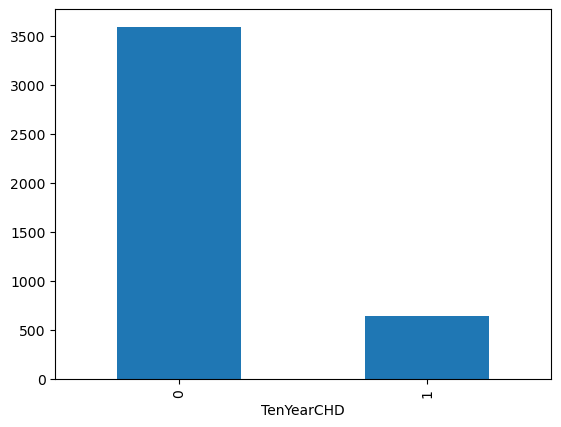

In [23]:
data.pivot_table(index='TenYearCHD', aggfunc='size').plot(kind='bar')

In [24]:
train_data = data1.sample(frac = 0.6, random_state = 42)
#output_train = data['Price'].sample(frac = 0.6, random_state=42)

test_val_data = data1.drop(train_data.index)
#output_test_val = data['Price'].drop(output_train.index)

val_data = test_val_data.sample(frac = 0.5, random_state = 42)
#output_val = output_test_val.sample(frac = 0.5, random_state = 42)

test_data = test_val_data.drop(val_data.index)
#output_test = output_test_val.drop(output_val.index)

<Axes: xlabel='TenYearCHD'>

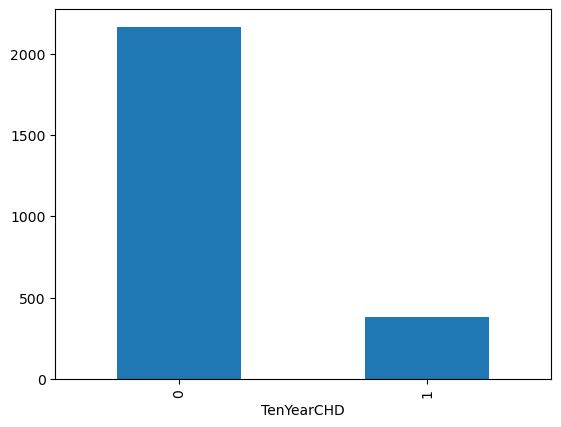

In [25]:
train_data.pivot_table(index='TenYearCHD', aggfunc='size').plot(kind='bar')

<Axes: xlabel='TenYearCHD'>

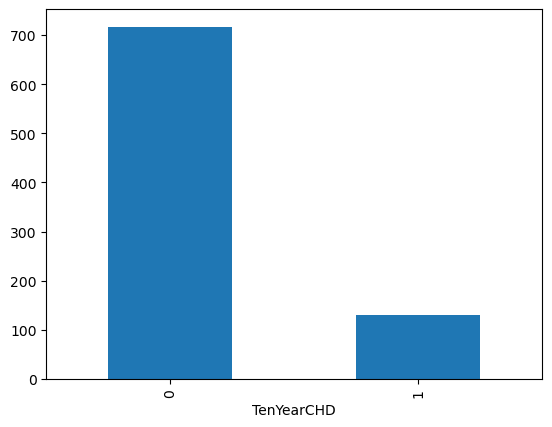

In [26]:
val_data.pivot_table(index='TenYearCHD', aggfunc='size').plot(kind='bar')

<Axes: xlabel='TenYearCHD'>

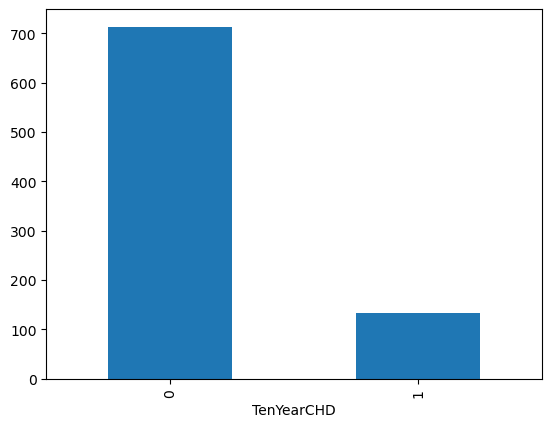

In [27]:
test_data.pivot_table(index='TenYearCHD', aggfunc='size').plot(kind='bar')

From Above we can see that data is very imbalannced and this can lead our model to predict only negative values i.e '0'.
But let's check Adaptive boosting model and see how it's working.

In [28]:
x_train = np.array(train_data)
y_train = np.array(train_data['TenYearCHD'])

x_val = np.array(val_data)
y_val = np.array(val_data['TenYearCHD'])

x_test = np.array(test_data)
y_test = np.array(test_data['TenYearCHD'])

print(x_train)

[[ 1.15305584  1.56495614 -0.88309943 ... -0.31958024  0.35100578
   0.        ]
 [ 1.15305584 -0.5348647   1.01620297 ...  0.75644211  0.25973681
   0.        ]
 [-0.86705605  0.16507558 -0.88309943 ... -0.07126739  0.65523568
   0.        ]
 ...
 [-0.86705605  0.39838901  0.06655177 ...  2.66017396  0.32058279
   0.        ]
 [-0.86705605 -1.35146169  1.01620297 ... -0.40235119 -0.31829999
   0.        ]
 [ 1.15305584 -1.11814826 -0.88309943 ...  0.34258736  0.2901598
   0.        ]]


In [29]:
from sklearn.tree import DecisionTreeClassifier

CHD_Classifier = DecisionTreeClassifier(max_depth = 100, random_state = 93)  

In [30]:
CHD_Classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=100, random_state=93)

In [31]:
train_predictions = CHD_Classifier.predict(x_train)
val_predictions = CHD_Classifier.predict(x_val)

In [32]:
train_accuracy = CHD_Classifier.score(x_train,y_train)
print("Accuracy of the model on train data = ",train_accuracy)
# Getting the accuracy on test data
val_accuracy = CHD_Classifier.score(x_val,y_val)
print("Accuracy of the model on validation data = ",val_accuracy)
from sklearn.metrics import classification_report
# Generating the report and printing the same
print(classification_report(y_val,val_predictions))


output = pd.DataFrame({"Actual" : y_val, "Predicted" : val_predictions})
print(output)

Accuracy of the model on train data =  1.0
Accuracy of the model on validation data =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       717
           1       1.00      1.00      1.00       131

    accuracy                           1.00       848
   macro avg       1.00      1.00      1.00       848
weighted avg       1.00      1.00      1.00       848

     Actual  Predicted
0         0          0
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
843       0          0
844       0          0
845       0          0
846       0          0
847       0          0

[848 rows x 2 columns]


In [34]:

test_predictions = CHD_Classifier.predict(x_test)
test_accuracy = CHD_Classifier.score(x_test,y_test)
print("Accuracy of the model on validation data = ",test_accuracy)
print(classification_report(y_test,test_predictions))

Accuracy of the model on validation data =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       713
           1       1.00      1.00      1.00       134

    accuracy                           1.00       847
   macro avg       1.00      1.00      1.00       847
weighted avg       1.00      1.00      1.00       847



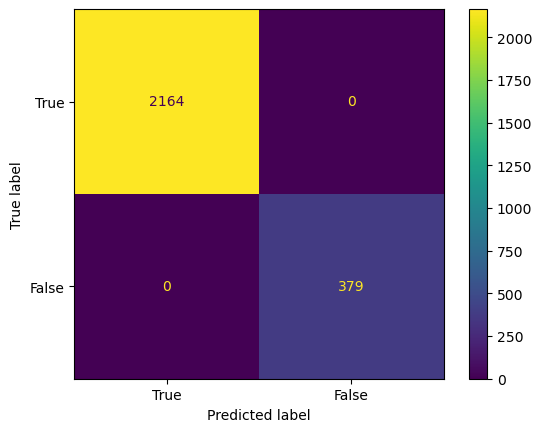

In [35]:
from sklearn import metrics

    
    
confusion_matrix = metrics.confusion_matrix(y_train, train_predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["True", "False"])

cm_display.plot()
plt.show()

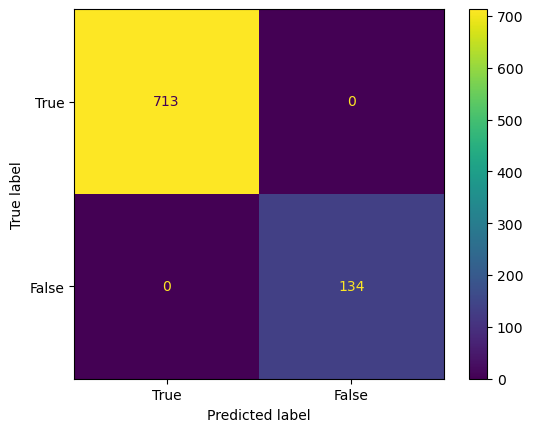

In [36]:
from sklearn import metrics

    
    
confusion_matrix = metrics.confusion_matrix(y_test, test_predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["True", "False"])

cm_display.plot()
plt.show()

In [37]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state = 96)

In [38]:
clf.fit(x_train, y_train)

AdaBoostClassifier(random_state=96)

In [39]:
clf.score(x_train, y_train)

1.0

In [40]:
train_pred = clf.predict(x_train)
val_pred = clf.predict(x_val)


In [41]:
train_accu = clf.score(x_train,y_train)
print("Accuracy of the model on train data = ",train_accu)
# Getting the accuracy on test data
val_accu = clf.score(x_val,y_val)
print("Accuracy of the model on validation data = ",val_accu)
from sklearn.metrics import classification_report
# Generating the report and printing the same
print(classification_report(y_val,val_pred))


out = pd.DataFrame({"Actual" : y_val, "Predicted" : val_pred})
print(out)

Accuracy of the model on train data =  1.0
Accuracy of the model on validation data =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       717
           1       1.00      1.00      1.00       131

    accuracy                           1.00       848
   macro avg       1.00      1.00      1.00       848
weighted avg       1.00      1.00      1.00       848

     Actual  Predicted
0         0          0
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
843       0          0
844       0          0
845       0          0
846       0          0
847       0          0

[848 rows x 2 columns]


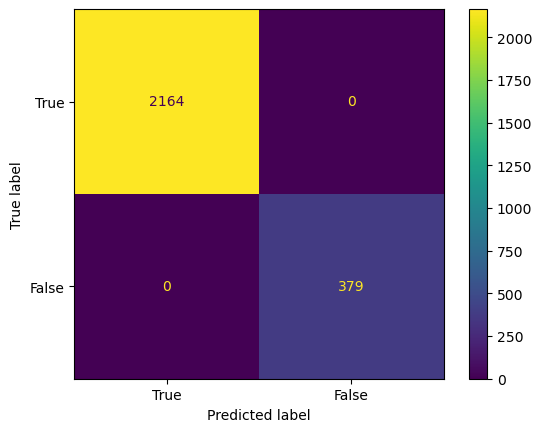

In [42]:
from sklearn import metrics

    
    
confusion_matrix = metrics.confusion_matrix(y_train, train_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["True", "False"])

cm_display.plot()
plt.show()

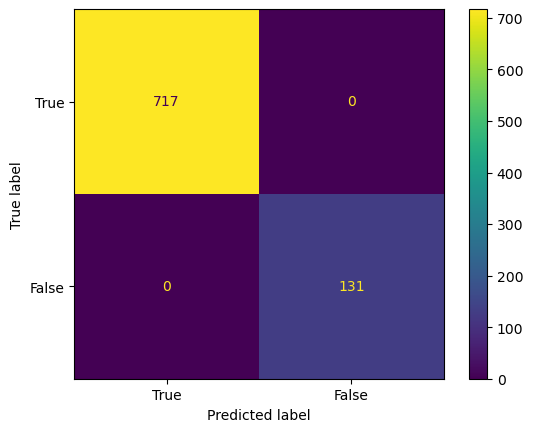

In [43]:
from sklearn import metrics

    
    
confusion_matrix = metrics.confusion_matrix(y_val, val_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["True", "False"])

cm_display.plot()
plt.show()